In [13]:
from modes import *

In [14]:
if __name__ == "__main__":
    wavelength = 1.55    
    gap = 0.5             
    w = 0.50              
    t = 0.25        

    mesh, basis0, eps = build_two_guides(gap_um=gap, w_um=w, t_um=t,
                                         n_core=3.45, n_clad=1.00)
    kappa, beta_e, beta_o = kappa_from_supermodes(eps, basis0, wavelength_um=wavelength)

    Lpi, L50 = lengths_from_CMT(kappa, delta_beta=0.0)

In [15]:
kappa # 1/µm

np.float64(0.0009853823936776251)

In [16]:
beta_e #1/µm

np.float64(9.868780424734895)

In [17]:
beta_o #1/µm

np.float64(9.86680965994754)

In [18]:
L50

np.float64(797.0491135590523)

In [19]:
wavelength = 1.55  # µm
n_core, n_clad = 3.45, 1.00
w, t, gap = 0.50, 0.25, 0.50

In [20]:
polys = OrderedDict(
    coreL=Polygon([(-gap/2 - w, 0), (-gap/2 - w, t), (-gap/2, t), (-gap/2, 0)]),
    coreR=Polygon([( gap/2, 0), ( gap/2, t), ( gap/2 + w, t), ( gap/2 + w, 0)]),
    clad=Polygon([(-6, 0), (-6, 2), (6, 2), (6, 0)]),
    box =Polygon([(-6, 0), (-6,-2), (6,-2), (6, 0)]),
)

In [21]:
mesh = from_meshio(mesh_from_OrderedDict(
    polys,
    resolutions=dict(coreL={"resolution":0.03,"distance":1.0},
                     coreR={"resolution":0.03,"distance":1.0}),
    default_resolution_max=0.2
))

In [22]:
basis0 = Basis(mesh, ElementTriP0(), intorder=4)

eps = basis0.zeros() + n_clad**2
eps[basis0.get_dofs(elements=("coreL",))] = n_core**2
eps[basis0.get_dofs(elements=("coreR",))] = n_core**2

modes = compute_modes(basis0, eps, wavelength=wavelength, num_modes=4)

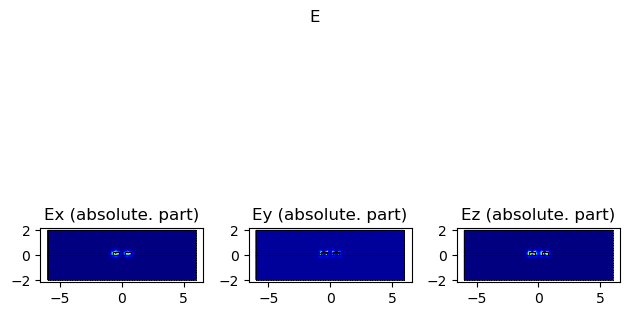

In [23]:
modes[0].show("E", part="abs") 

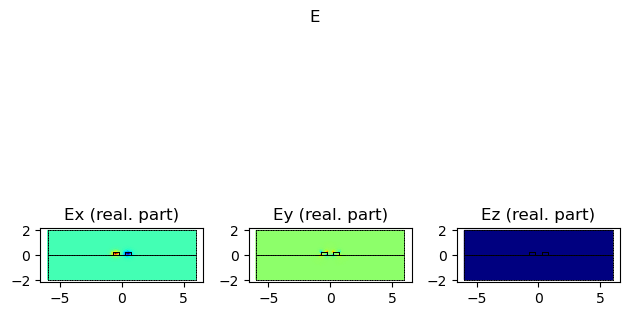

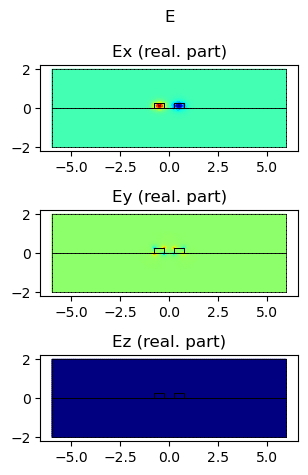

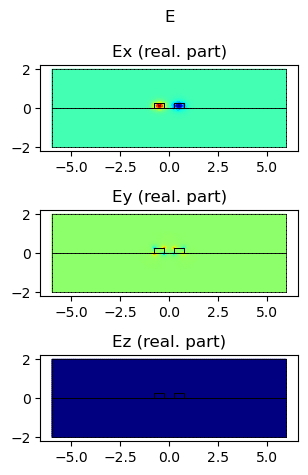

In [24]:
for comp in ["x", "y", "z"]:
    modes[0].show("E", direction=comp, part="real")